In [ ]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Customer_churn = pd.read_csv('/content/drive/My Drive/Assignment3/CustomerChurn_dataset.csv')
Customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
Customer_churn.shape

(7043, 21)

In [ ]:
Customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
Customer_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
pip install pandas scikit-learn matplotlib


1. Feature extraction

In [ ]:
Customer_churn.drop('customerID', axis=1, inplace=True) #dropping ID: not relevant in predicting churn
Customer_churn['TotalCharges'] = pd.to_numeric(Customer_churn['TotalCharges'], errors='coerce') # Converting 'TotalCharges' to numeric
columns_to_one_hot_encode = ["MultipleLines", "InternetService", "Contract", "PaymentMethod"]
Customer_churn = pd.get_dummies(Customer_churn, columns=columns_to_one_hot_encode, drop_first=True) # One hot encode
columns_to_label_encode = ["gender", "Partner", "Dependents", "PhoneService", "OnlineSecurity",
                           "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
                           "StreamingMovies", "PaperlessBilling", "Churn"] # Label Encode

label_encoder = LabelEncoder()
for column in columns_to_label_encode:
    Customer_churn[column] = label_encoder.fit_transform(Customer_churn[column])

In [ ]:
from joblib import dump
dump(label_encoder, 'label_encoder.joblib')


['label_encoder.joblib']

In [ ]:
columns_with_missing_values =Customer_churn.columns[Customer_churn.isnull().any()].tolist()
imputer = SimpleImputer(strategy='mean') #filling missing values if exist
Customer_churn[columns_with_missing_values] = imputer.fit_transform(Customer_churn[columns_with_missing_values])

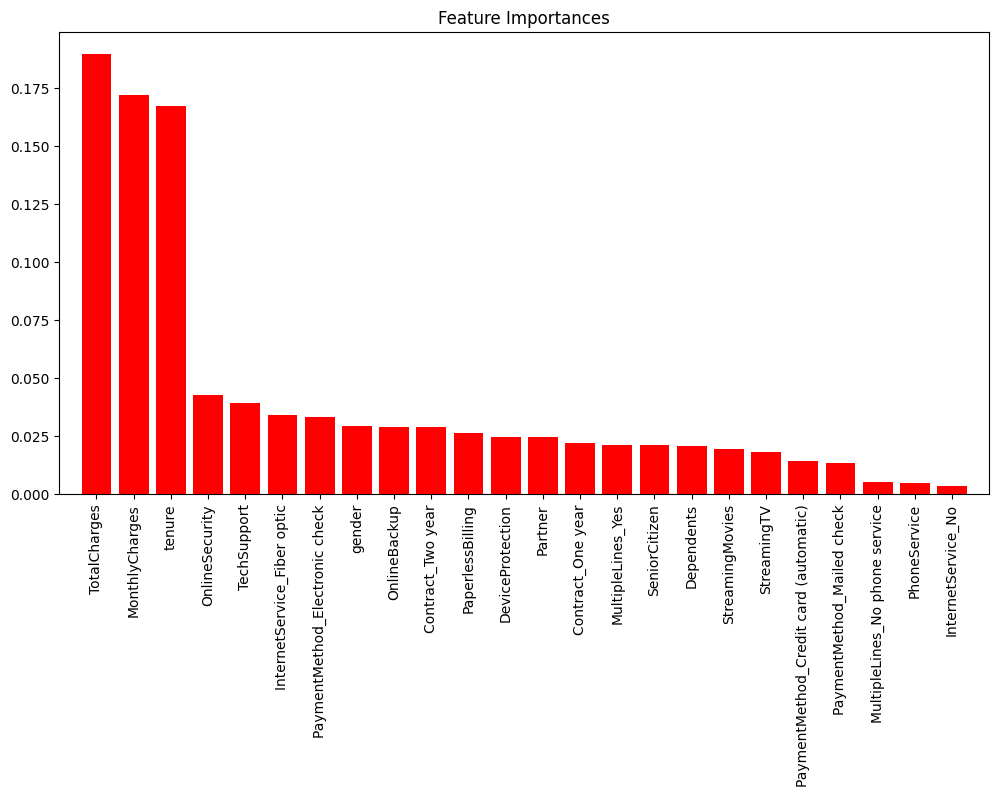

In [ ]:
#Using feature importance to identify important features
Y=Customer_churn['Churn']
X=Customer_churn.drop('Churn',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Extracting feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
# Number of top features to select
# Selecting features with a feature importance score of 0.03 and above, as seen on graph
N = 7
importances = rf.feature_importances_
top_indices = np.argsort(importances)[::-1][:N]
top_features_with_importance = [(X_train.columns[index], importances[index]) for index in top_indices]
print("Top {} Features of High Importance:".format(N))
for feature, importance in top_features_with_importance:
    print(f"{feature}: {importance:.4f}")# display features
selected_features = [feature for feature, _ in top_features_with_importance]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features] # Retraining with selected features

rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

Top 7 Features of High Importance:
TotalCharges: 0.1899
MonthlyCharges: 0.1718
tenure: 0.1671
OnlineSecurity: 0.0427
TechSupport: 0.0392
InternetService_Fiber optic: 0.0340
PaymentMethod_Electronic check: 0.0331


RandomForestClassifier(random_state=42)

In [ ]:
#Scaling
# Separate the target variable 'Churn' from the features
X = Customer_churn[selected_features]
y = Customer_churn['Churn']
numeric_columns = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

In [ ]:
concatenated_data = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y], axis=1)

In [ ]:
scaler_filename = "scaler_model.joblib"  # Saving scaler
joblib.dump(scaler, scaler_filename)

['scaler_model.joblib']

2.  EDA

Churn Rate for Senior Citizen Men with Partner and Dependents: 
0    51.639344
1    48.360656
Name: Churn, dtype: float64


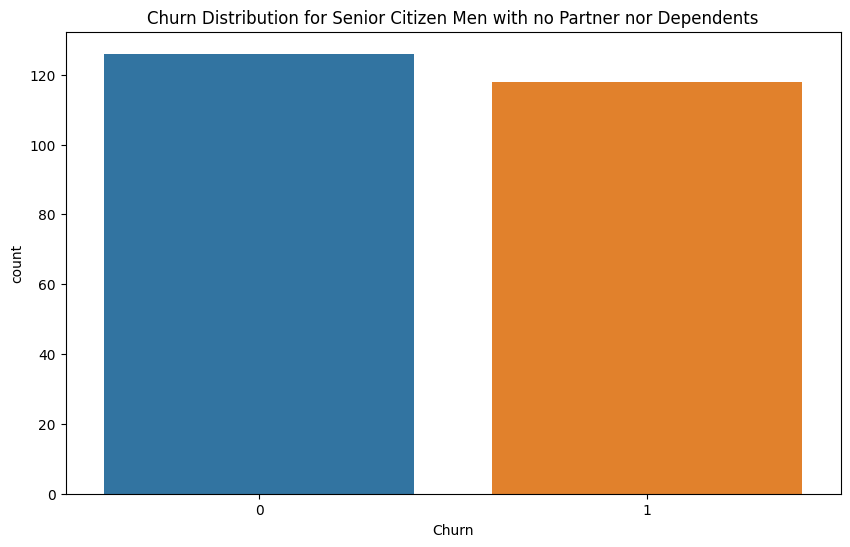

Churn Rate for Senior Citizen Women with Partner and Dependents: 
0    50.157729
1    49.842271
Name: Churn, dtype: float64


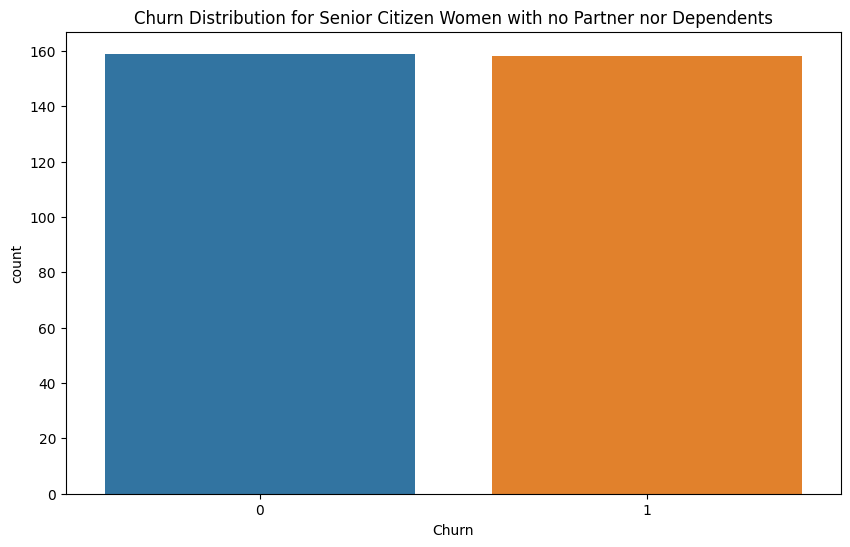


Overall Churn Rate: 
0    73.463013
1    26.536987
Name: Churn, dtype: float64


In [ ]:
# Analyzing churn for Senior Citizen men with no partners and dependents
segmented_data_men = Customer_churn[(Customer_churn['SeniorCitizen'] == 1) & # 1 is for Yes
                                    (Customer_churn['gender'] == 1) &  # 1 is for Male
                                    (Customer_churn['Partner'] == 0) &  # 0 is for no Partner
                                    (Customer_churn['Dependents'] == 0)]  # 0 is for no Dependents

# Analyzing churn for Senior Citizen women with partners and dependents
segmented_data_women = Customer_churn[(Customer_churn['SeniorCitizen'] == 1) &  # 1 is for Yes
                                      (Customer_churn['gender'] == 0) &  #0 is for Female
                                      (Customer_churn['Partner'] == 0) &  # 1 is for a Partner
                                      (Customer_churn['Dependents'] == 0)]  # 1 is for having a Dependents

# Visualization for men
if not segmented_data_men.empty:
    segment_churn_rate_men = segmented_data_men['Churn'].value_counts(normalize=True) * 100
    print("Churn Rate for Senior Citizen Men with Partner and Dependents: ")
    print(segment_churn_rate_men)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Churn', data=segmented_data_men)
    plt.title("Churn Distribution for Senior Citizen Men with no Partner nor Dependents")
    plt.show()
else:
    print("No data available for Senior Citizen Men with no Partner nor Dependents segment.")

# Visualization for women
if not segmented_data_women.empty:
    segment_churn_rate_women = segmented_data_women['Churn'].value_counts(normalize=True) * 100
    print("Churn Rate for Senior Citizen Women with Partner and Dependents: ")
    print(segment_churn_rate_women)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Churn', data=segmented_data_women)
    plt.title("Churn Distribution for Senior Citizen Women with no Partner nor Dependents")
    plt.show()
else:
    print("No data available for Senior Citizen Women with Partner and Dependents segment.")

# Comparing with overall churn rate
overall_churn_rate = Customer_churn['Churn'].value_counts(normalize=True) * 100
print("\nOverall Churn Rate: ")
print(overall_churn_rate)


Analysis of seaborn's countplot

 Senior Citizen Men with No Partner nor Dependents:The churn rate for this group is almost evenly split, with 51.64% not churning and 48.36% churning. This suggests that senior citizen men without partners or dependents are almost as likely to churn as they are to stay.


Senior Citizen Women with No Partner nor Dependents: The churn rate here is also nearly balanced, with 50.16% not churning and 49.84% churning. This indicates a similar trend to the male counterpart, where senior citizen women without partners or dependents are nearly equally likely to churn or stay.


Overall Churn Rate: The overall churn rate in the dataset is 73.46% for customers not churning and 26.54% for those who do. This rate is significantly lower than the churn rates observed in the senior citizen segments without partners or dependents. In summary, the results indicate that senior citizens without partners or dependents are at a higher risk of churning than the average customer

EDA Continued

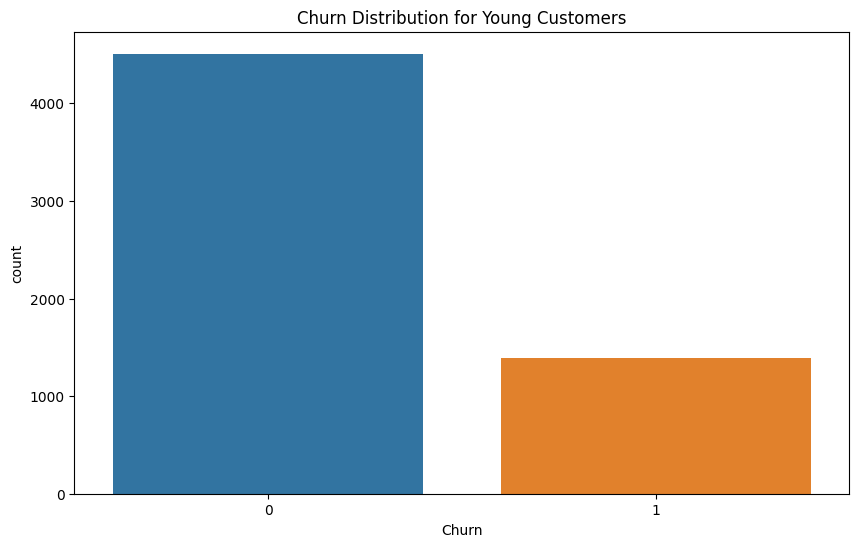

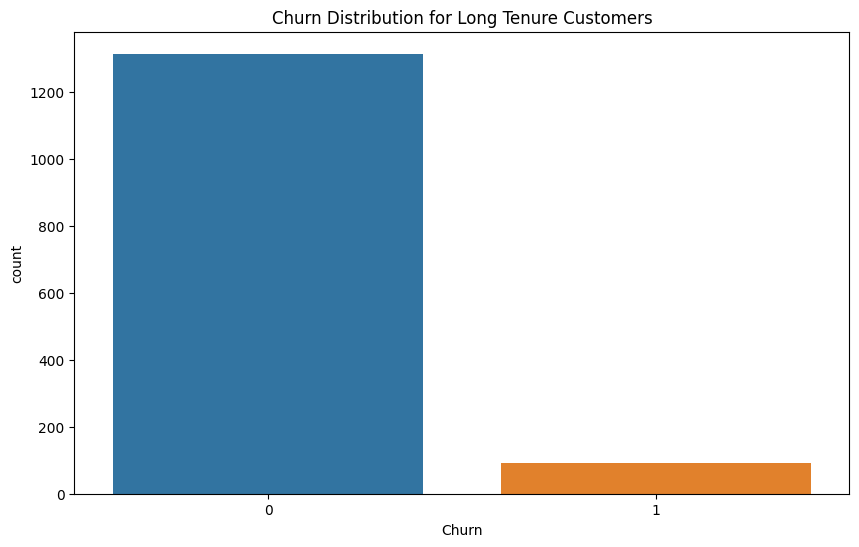

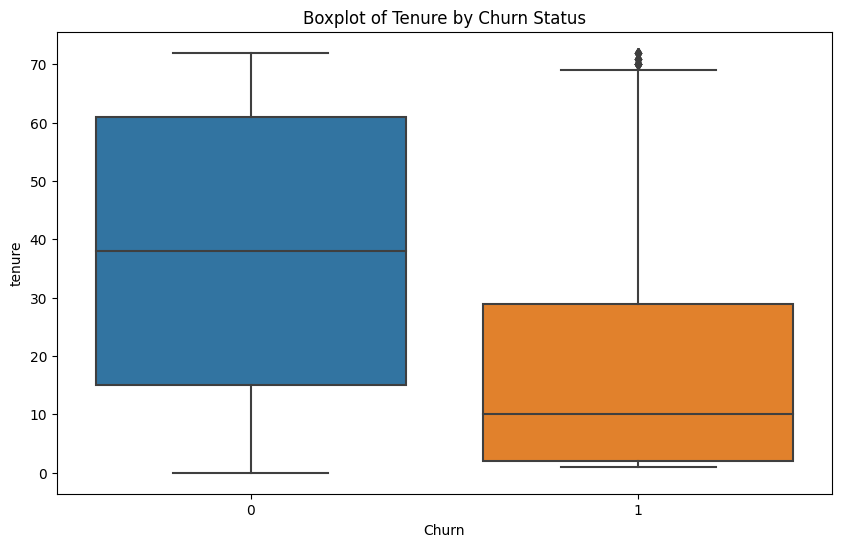


Overall Churn Rate: 
0    73.463013
1    26.536987
Name: Churn, dtype: float64


In [ ]:
segment_young = Customer_churn[Customer_churn['SeniorCitizen'] == 0]
segment_long_tenure = Customer_churn[Customer_churn['tenure'] > 60]

# Visualization for Young Customers Churn Rate
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=segment_young)
plt.title("Churn Distribution for Young Customers")
plt.show()

# Visualization for Long Tenure Customers Churn Rate
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=segment_long_tenure)
plt.title("Churn Distribution for Long Tenure Customers")
plt.show()

# Boxplot for Tenure and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=Customer_churn)
plt.title("Boxplot of Tenure by Churn Status")
plt.show()

# Overall Churn Rate for comparison
overall_churn_rate = Customer_churn['Churn'].value_counts(normalize=True) * 100
print("\nOverall Churn Rate: ")
print(overall_churn_rate)



Young Customers Churn Rate: A countplot is used to show the churn distribution among young customers (non-senior citizens). The plot displays the number of young customers who have churned versus those who haven't.

Long Tenure Customers Churn Rate: Another countplot is used to visualize the churn distribution among customers with a tenure greater than 60. This plot shows how many long-tenured customers have churned compared to those who have stayed.

Boxplot for Tenure and Churn: A boxplot is created to compare the tenure distribution between customers who churned and those who didn't. This plot indicates whether customers who churn tend to have shorter or longer tenures compared to those who stay.

Overall Churn Rate for Comparison: The overall churn rate is provided for context. In your dataset, 73.46% of customers have not churned, while 26.54% have.

Churn Rate for Male Customers: 
0    73.839662
1    26.160338
Name: Churn, dtype: float64


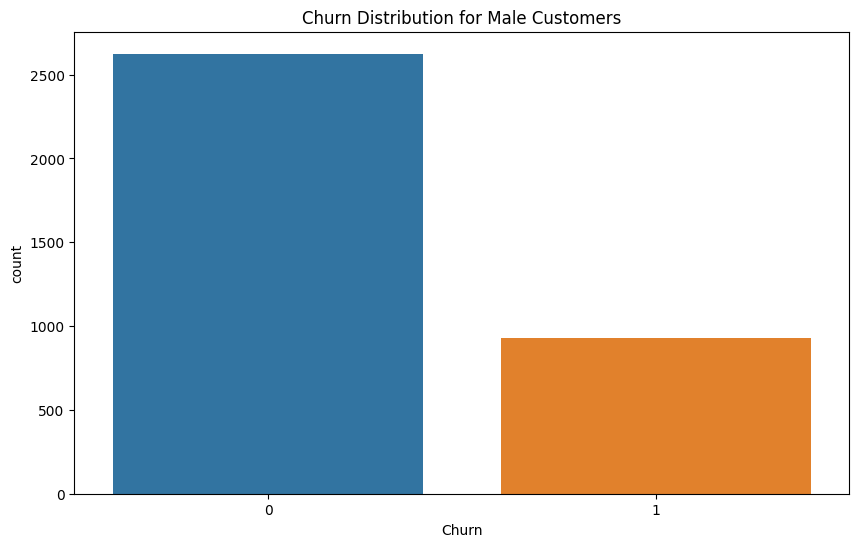

Churn Rate for Female Customers: 
0    73.079128
1    26.920872
Name: Churn, dtype: float64


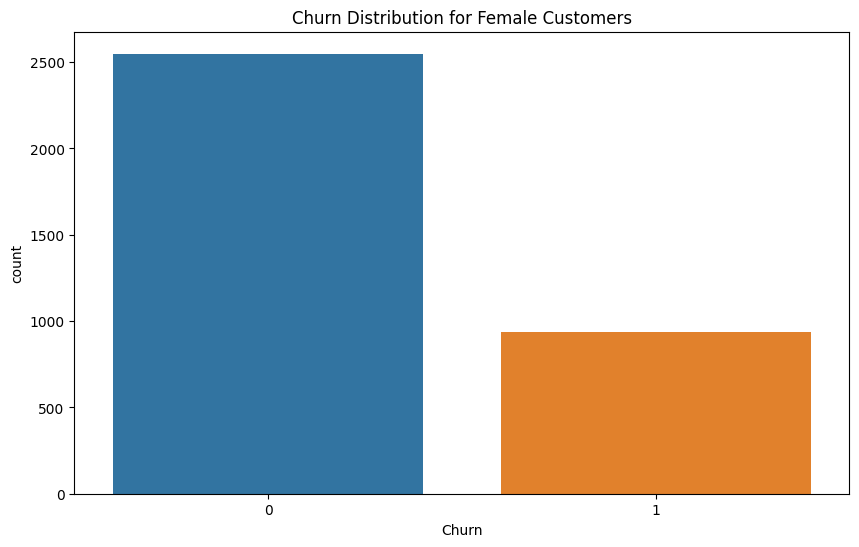


Overall Churn Rate: 
0    73.463013
1    26.536987
Name: Churn, dtype: float64


In [ ]:
# Segment for Male Customers
segmented_data_male = Customer_churn[Customer_churn['gender'] == 1]  # 1 is for Male

# Segment for Female Customers
segmented_data_female = Customer_churn[Customer_churn['gender'] == 0]  # 0 is for Female

# Visualization for Male Customers
if not segmented_data_male.empty:
    segment_churn_rate_male = segmented_data_male['Churn'].value_counts(normalize=True) * 100
    print("Churn Rate for Male Customers: ")
    print(segment_churn_rate_male)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Churn', data=segmented_data_male)
    plt.title("Churn Distribution for Male Customers")
    plt.show()
else:
    print("No data available for Male Customers segment.")

# Visualization for Female Customers
if not segmented_data_female.empty:
    segment_churn_rate_female = segmented_data_female['Churn'].value_counts(normalize=True) * 100
    print("Churn Rate for Female Customers: ")
    print(segment_churn_rate_female)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Churn', data=segmented_data_female)
    plt.title("Churn Distribution for Female Customers")
    plt.show()
else:
    print("No data available for Female Customers segment.")

# Comparing with overall churn rate
overall_churn_rate = Customer_churn['Churn'].value_counts(normalize=True) * 100
print("\nOverall Churn Rate: ")
print(overall_churn_rate)


The countplot visualization for male customers shows the distribution of churned versus non-churned male customers, providing a visual representation of these percentages.Churn Rate for Male Customers: Churn rate among male customers is 73.84% for those who did not churn and 26.16% for those who did. This means that approximately 26% of the male customer segment churned.

Churn Rate for Female Customers:
Churn rate among female customers is 73.08% for non-churners and 26.92% for churners. This indicates that around 27% of the female customer segment churned, which is slightly higher than the churn rate for male customers.
The countplot for female customers similarly illustrates the churn distribution in this segment.
Overall Churn Rate: The overall churn rate in the dataset is 73.46% for customers who did not churn and 26.54% for those who did.
In summary, the analysis shows that while there is a slight variation in churn rates between male and female customers, both are closely aligned with the overall churn rate

3. Training

In [ ]:
!pip install tensorflow


In [ ]:
!pip install keras-tuner


In [ ]:
!pip install tensorflow scikeras scikit-learn

In [ ]:
!pip install tensorflow==2.12.0

In [ ]:
X = concatenated_data[selected_features]

In [ ]:
!pip install scikeras  # Install SciKeras

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

X = concatenated_data[selected_features]
y = concatenated_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining MLP model using the Functional API
def create_mlp_model(input_dim, hidden_layer_sizes=[64, 32], activation='relu'):
    input_layer = Input(shape=(input_dim,))
    x = input_layer
    for layer_size in hidden_layer_sizes:
        x = Dense(layer_size, activation=activation)(x)
    output_layer = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# hyperparameters to search
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128,), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'epochs': [10, 20],
    'batch_size': [16, 32],
}

mlp = KerasClassifier(build_fn=create_mlp_model, input_dim=7, verbose=0) # MLP model using KerasClassifier
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # StratifiedKFold cross-validation object

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Hyperparameters:")
print(best_params)
print("Best Accuracy:")
print(best_accuracy)


<ipython-input-24-86df564ee4c3>:41: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  mlp = KerasClassifier(build_fn=create_mlp_model, input_dim=7, verbose=0)


59/59 [==============================] - 0s 3ms/step
Best Hyperparameters:
{'activation': 'relu', 'batch_size': 32, 'epochs': 20, 'hidden_layer_sizes': (64, 32)}
Best Accuracy:
0.7992545260915868


In [ ]:
%%writefile createModel.py
# Define your MLP model with the best hyperparameters

def create_mlp_model(input_dim, hidden_layer_sizes=(64,), activation='relu'):
    input_layer = Input(shape=(input_dim,))
    x = input_layer
    for layer_size in hidden_layer_sizes:
        x = Dense(layer_size, activation=activation)(x)
    output_layer = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


Writing createModel.py


4. Retraining, Optimization, Retesting

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Create and train the model with the best hyperparameters
input_dim = X_train.shape[1]
best_model = create_mlp_model(input_dim=input_dim, hidden_layer_sizes=(64,), activation='relu')
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

y_pred = best_model.predict(X_test)  # Predict on the test set
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

accuracy = accuracy_score(y_test, y_pred_binary) # accuracy score
auc_score = roc_auc_score(y_test, y_pred) # AUC score

print("Test Accuracy:", accuracy)
print("Test AUC Score:", auc_score)


Epoch 1/20
177/177 [==============================] - 1s 3ms/step - loss: 0.4757 - accuracy: 0.7808
Epoch 2/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.7879
Epoch 3/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.7914
Epoch 4/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.7918
Epoch 5/20
177/177 [==============================] - 0s 3ms/step - loss: 0.4352 - accuracy: 0.7934
Epoch 6/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.7936
Epoch 7/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.7950
Epoch 8/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7959
Epoch 9/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.7946
Epoch 10/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.7946

In [ ]:

best_params['hidden_layer_sizes'] = (128, 32)

# Retraining with optimized parameters
optimized_model = create_mlp_model(input_dim=input_dim, hidden_layer_sizes=(64,), activation='relu')
optimized_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

# Re-evaluating optimized model
y_pred_optimized = optimized_model.predict(X_test)
y_pred_optimized_binary = (y_pred_optimized > 0.5).astype(int)

accuracy_optimized = accuracy_score(y_test, y_pred_optimized_binary) #  accuracy for the optimized model
auc_score_optimized = roc_auc_score(y_test, y_pred_optimized) # AUC score for the optimized model

print("Optimized Test Accuracy:", accuracy_optimized)
print("Optimized Test AUC Score:", auc_score_optimized)

Epoch 1/20
177/177 [==============================] - 1s 4ms/step - loss: 0.4810 - accuracy: 0.7840
Epoch 2/20
177/177 [==============================] - 1s 4ms/step - loss: 0.4414 - accuracy: 0.7861
Epoch 3/20
177/177 [==============================] - 1s 3ms/step - loss: 0.4378 - accuracy: 0.7914
Epoch 4/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7953
Epoch 5/20
177/177 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.7913
Epoch 6/20
177/177 [==============================] - 1s 4ms/step - loss: 0.4346 - accuracy: 0.7941
Epoch 7/20
177/177 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.7950
Epoch 8/20
177/177 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.7920
Epoch 9/20
177/177 [==============================] - 0s 3ms/step - loss: 0.4334 - accuracy: 0.7952
Epoch 10/20
177/177 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.7953

In [ ]:
with open('auc_score.txt', 'w') as f:
    f.write(f'AUC Score: {auc_score:.4f}')

In [ ]:
import pickle
# Use pickle to save the trained model
with open('Nbest_model.plk', 'wb') as f:
    pickle.dump(best_model, f)